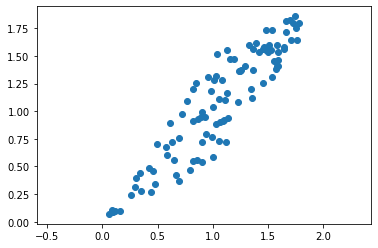

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# make up some data for x
D = 2
x= torch.rand(100,D)
x[:,0] = x[:,0] + x[:,1]
x[:,1] = 0.5*x[:,0] + x[:,1]

plt.scatter(x[:,0],x[:,1])
plt.axis('equal')
  
# DataLoader is used to load the dataset 
# for training
loader = torch.utils.data.DataLoader(dataset = x, batch_size=100)

In [2]:
class AE(torch.nn.Module):
    """Custom Pytorch model for gradient optimization.
    """
    def __init__(self):
        
        super().__init__()
        # initialize weights with random numbers
        self.wEncoder = torch.randn(D,1, requires_grad=True)
        self.wDecoder = torch.randn(1,D, requires_grad=True)
        self.bEncoder = torch.randn(1, requires_grad=True)
        self.bDecoder = torch.randn(1,D, requires_grad=True)
        # make weights torch parameters
        #self.wEncoder = torch.nn.Parameter(wEncoder)        
        #self.wDecoder = torch.nn.Parameter(wDecoder)        
        #self.bEncoder = torch.nn.Parameter(bEncoder)        
        #self.bDecoder = torch.nn.Parameter(bDecoder)        


    def encoder(self, X):
      return torch.matmul(X,self.wEncoder)+self.bEncoder
    def decoder(self, X):
      return torch.matmul(X,self.wDecoder)+self.bDecoder

    def forward(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded
    


(-0.30102874264121054,
 1.8811072401702404,
 -0.6933495044708252,
 2.0659166812896728)

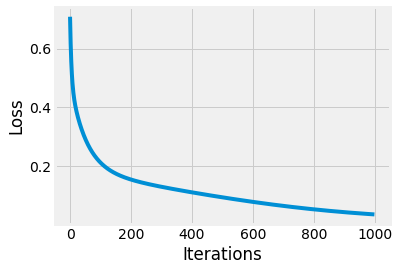

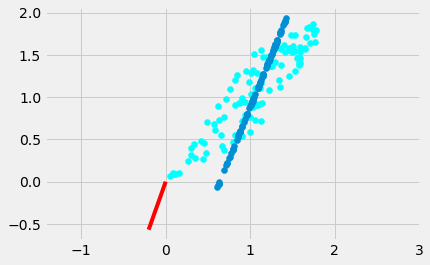

In [3]:
# Model Initialization
model = AE()
  
# Validation using MSE Loss function
loss = torch.nn.MSELoss()
  
optimizer = torch.optim.SGD([model.wEncoder, model.wDecoder, model.bEncoder, model.bDecoder], lr=0.01)  

epochs = 1000
outputs = []
losses = []
for epoch in range(epochs):
    for (entry) in loader:
      # Output of Autoencoder
      x_reconstructed = model(entry)
        
      # Calculating the loss 
      myloss = loss(x_reconstructed, entry)
        
      # The gradients are set to zero,
      # the the gradient is computed and stored.
      # .step() performs parameter update
      optimizer.zero_grad()
      myloss.backward()
      optimizer.step()
        
      # Storing the losses in a list for plotting
      losses.append(myloss)
      outputs.append((epoch, entry, x_reconstructed))
  
# Defining the Plot Style
plt.figure(0)
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses)

plt.figure(1)
plt.scatter(x[:,0],x[:,1],color='cyan'); 
plt.scatter(x_reconstructed.detach()[:,0],x_reconstructed.detach()[:,1]); 
plt.plot([0,model.wEncoder[0,0]], [0,model.wEncoder[1,0]],'-r'); 
plt.axis('equal')

(-0.08977501392364502,
 1.8852752923965455,
 -0.09347766637802124,
 1.963030993938446)

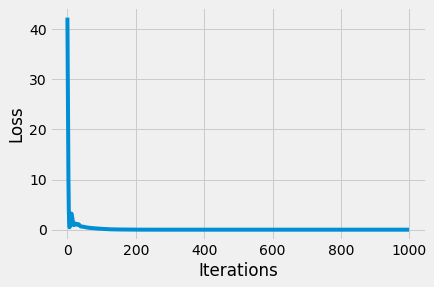

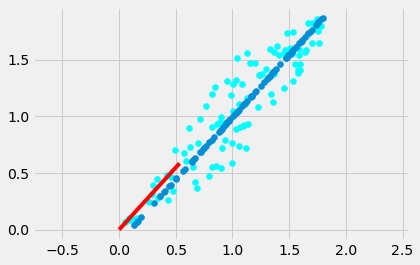

In [4]:
# Model Initialization
model = AE()
  
# Validation using MSE Loss function
loss = torch.nn.MSELoss()
  
optimizer = torch.optim.RMSprop([model.wEncoder, model.wDecoder, model.bEncoder, model.bDecoder], lr=0.01, momentum=0.9)  

epochs = 1000
outputs = []
losses = []
for epoch in range(epochs):
    for (entry) in loader:
      # Output of Autoencoder
      x_reconstructed = model(entry)
        
      # Calculating the loss 
      myloss = loss(x_reconstructed, entry)
        
      # The gradients are set to zero,
      # the the gradient is computed and stored.
      # .step() performs parameter update
      optimizer.zero_grad()
      myloss.backward()
      optimizer.step()
        
      # Storing the losses in a list for plotting
      losses.append(myloss)
      outputs.append((epoch, entry, x_reconstructed))
  
# Defining the Plot Style
plt.figure(0)
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses)

plt.figure(1)
plt.scatter(x[:,0],x[:,1],color='cyan'); 
plt.scatter(x_reconstructed.detach()[:,0],x_reconstructed.detach()[:,1]); 
plt.plot([0,model.wEncoder[0,0]], [0,model.wEncoder[1,0]],'-r'); 
plt.axis('equal')

(-0.08909596204757692,
 1.871015202999115,
 -0.09300332069396973,
 1.9530697345733643)

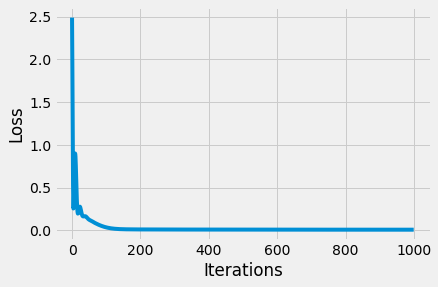

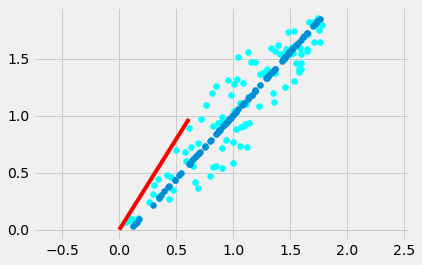

In [5]:
# Model Initialization
model = AE()
  
# Validation using MSE Loss function
loss = torch.nn.MSELoss()
  
optimizer = torch.optim.SGD([model.wEncoder, model.wDecoder, model.bEncoder, model.bDecoder], lr=0.01, momentum=0.9)  

epochs = 1000
outputs = []
losses = []
for epoch in range(epochs):
    for (entry) in loader:
      # Output of Autoencoder
      x_reconstructed = model(entry)
        
      # Calculating the loss 
      myloss = loss(x_reconstructed, entry)
        
      # The gradients are set to zero,
      # the the gradient is computed and stored.
      # .step() performs parameter update
      optimizer.zero_grad()
      myloss.backward()
      optimizer.step()
        
      # Storing the losses in a list for plotting
      losses.append(myloss)
      outputs.append((epoch, entry, x_reconstructed))
  
# Defining the Plot Style
plt.figure(0)
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses)

plt.figure(1)
plt.scatter(x[:,0],x[:,1],color='cyan'); 
plt.scatter(x_reconstructed.detach()[:,0],x_reconstructed.detach()[:,1]); 
plt.plot([0,model.wEncoder[0,0]], [0,model.wEncoder[1,0]],'-r'); 
plt.axis('equal')

# Findings
The results from running SGD without a momentum term indicate that 1000 epochs weren't enough to reache full convergence. We can see that the loss function hasn't reached rock bottom and we can also see in the scatter plot the the axis of the reconstructed points is off as are the encoder weights represented by the red vector. 

The third cell (just above this cell) shows SGD with a momentum term and we can see that the convergence is already much better (faster per number of epochs), yet not perfect. The loss function seems to have approached very low levels as from ca. 150 epochs and the scatter plot shows the cyan (orginal data set) and blue dots (reconstructed data set) being aligned on the main axis of variance (first principal compenent) of the the orginial data set. The only indication that full convergence hasn't been reached yet is the red weights vector for the encoder weights which doesn't quite lined up with the first principle component.

Last but not least the second cell shows the usage of the RMSprop optimizer wich is yet another improvement in therms of convergence per number of epochs and the results suggest full convergence. The loss function is very low as from ca. 50 epochs and the scatter plot shows full alignemnt of the reconstructed data set with the first principal component of the original data set. Last but not least, the red weights vector alligns with the first principla component. 

# Additional questions for AIML students
## Question 1
The relationship between the above autoencoder and PCA:
The relationship is pretty well explained in this paper https://arxiv.org/pdf/1804.10253.pdf or these blog posts:
https://towardsdatascience.com/build-the-right-autoencoder-tune-and-optimize-using-pca-principles-part-i-1f01f821999b
https://towardsdatascience.com/build-the-right-autoencoder-tune-and-optimize-using-pca-principles-part-ii-24b9cca69bd6

We don't use any non-linear activation function (none at all actually) in our code as the diagram in the assgignement didn't have one either. We furthermore limitted to neuron in the hidden layer to one, reducing the auto-encoder basically to the first principle component of a PCA. So one obvious difference between this particular (above) autoencoder and a PCA is that the PCA per se isn't restricted to one single component, while our autoencoder due to the architecture choice in the diagram of the assignemnet is. 

If one were to allow for a different architecture with more neurons in the hidden layer one could achieve aquivalence in output without necessarily taking the same "algebraic" route to get there (as demonstrated in above paper c.f. page 3ff.)

So in more general terms without referencing the exact above autoencoder, the difference is as follows:
"The linear autoencoder is said to apply PCA to the input data in the sense that its output is a projection of the data onto the low dimensional principal subspace. However, unlike actual PCA, the coordinates of the output of the bottleneck (middle layer) are correlated and are not sorted in descending order of variance." https://arxiv.org/pdf/1804.10253.pdf

That said, the loading vectors of the original data as one would get via PCA can be derived from either the weights matrix of the endoder or the one of the decoder (cf. page 4 https://arxiv.org/pdf/1804.10253.pdf)

One can try to artificially constrain autoencoder to mimic some of the inherent properties exhibited by a PCA (e.g. symmetry and orthogonality of encoder and decoder weights, uncorrelatedness of encoded features (bottleneck layer), etc...
(c.f. https://github.com/cran2367/pca-autoencoder-relationship/blob/master/pca-autoencoder-relationship.ipynb) 




## Question 2
RMSprop and Adam optimisers seem to prefer travelling along diagonal lines, because they use different learning rates for each parameter they try to optimize as they divide the gradient by it's root mean square in each dimension with is like looking just at the sign of the gradient and not the magnitude. As a result of it we don't try to move anymore in an orthogonal fashion along the "isobar lines". In a 2D coordinate system (2 parameters) with the just a sign to determine the direction of travel you are bound to move diagonally